In [6]:
import numpy as np
from scipy import constants
from astropy import units as u
def b2t(brightness): #brightness in Jy/beam, source size is diameter of source in arcsec, frequency in GHz
    beam_area_str = np.pi*np.radians(0.5/3600)**2/(4*np.log(2)) #beam area in str     
    T = brightness*1e-26/beam_area_str*(constants.c**2)/(2*((90*1e9)**2)*constants.k) #brightness*1e-26 to convert Jy to SI unit, T in K, Rayleigh-Jeans approximation
    return T #unit K

In [7]:
#find peaks for four spectral windows in ALMA band 3.
#spw31 (90.591773528-91.41142972 GHz) SPW IV
#spw29 (93.14416468-93.202690293 GHz) SPW III
#spw27 (103.399460288-103.51656492000001GHz) SPW II
#spw25 (103.283477188-103.40055130200001 GHz) SPW I

%matplotlib inline
import mpld3
mpld3.enable_notebook() #enable interactive plot with zoom and pan functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy.signal import find_peaks
df31 = pd.read_csv("Data/LB Band 3/spw31.csv") #read spw31
df29 = pd.read_csv("Data/LB Band 3/spw29.csv") #read spw29
df27 = pd.read_csv("Data/LB Band 3/spw27.csv") #read spw27
df25 = pd.read_csv("Data/LB Band 3/spw25.csv") #read spw25

dfa = pd.read_csv("a-ch3od.csv")
dfe = pd.read_csv("e-ch3od.csv")

xa = dfa["FreqLsb"]*1000
ya = dfa["Int"].map(b2t)*4

xe = dfe["FreqLsb"]*1000
ye = dfe["Int"].map(b2t)*4

x31 = df31["FreqLsb"] #spw31 x-axis frequency
y31 = df31["Int"] #spw31 y-axis intensity

x29 = df29["FreqLsb"] #spw29 x-axis frequency
y29 = df29["Int"] #spw29 y-axis intensity

x27 = df27["FreqLsb"] #spw27 x-axis frequency
y27 = df27["Int"] #spw27 y-axis intensity

x25 = df25["FreqLsb"] #spw25 x-axis frequency
y25 = df25["Int"] #spw25 y-axis intensity

sigma31 = 0.250882357 #spw31 standard deviation of noise
sigma29 = 0.318585301 #spw29 standard deviation of noise
sigma27 = 0.235287379 #spw27 standard deviation of noise
sigma25 = 0.298093269 #spw25 standard deviation of noise

In [8]:
peaks31 = find_peaks(y31, height = 3*sigma31, distance = 5)
height31 = peaks31[1]['peak_heights'] #spw31 list of heights of peaks
peak_pos31 = x31[peaks31[0]] #spw31 list of peak positions

peaks29 = find_peaks(y29, height = 3*sigma29, distance = 25)
height29 = peaks29[1]['peak_heights'] #spw29 list of heights of peaks
peak_pos29 = x29[peaks29[0]] #spw29 list of peak positions

peaks27 = find_peaks(y27, height = 3*sigma27, distance = 20)
height27 = peaks27[1]['peak_heights'] #spw27 list of heights of peaks
peak_pos27 = x27[peaks27[0]] #spw27 list of peak positions

peaks25 = find_peaks(y25, height = 3*sigma25, distance = 20)
height25 = peaks25[1]['peak_heights'] #spw25 list of heights of peaks
peak_pos25 = x25[peaks25[0]] #spw25 list of peak positions

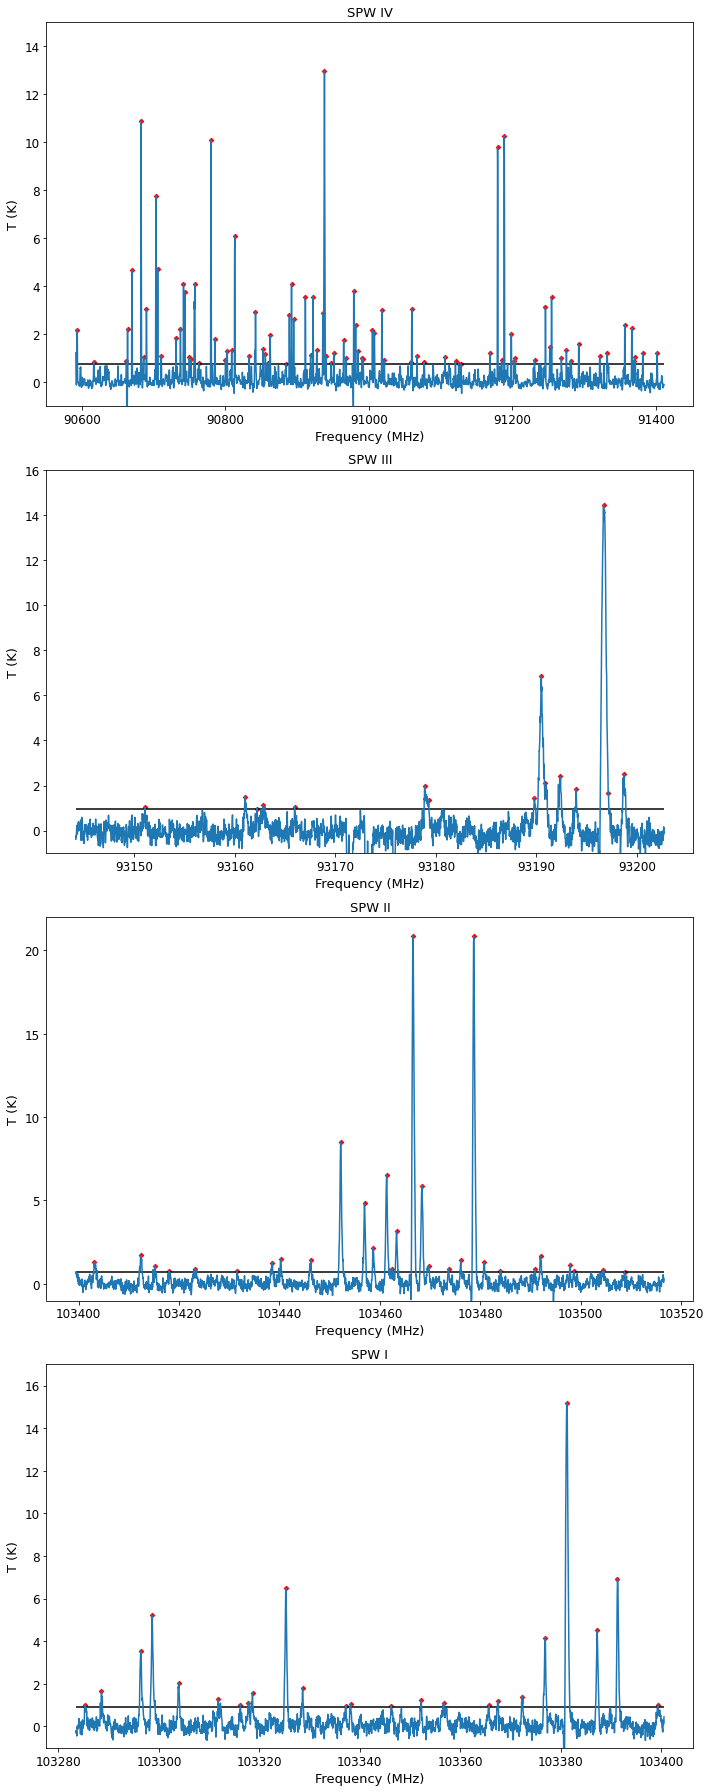

In [9]:
#plot out all spectral windows, black horizontal lines indicate 3 sigma levels, red diamonds indicate peaks with S/N larger than 3 sigma

fig, (ax31, ax29, ax27, ax25) = plt.subplots(4,figsize=(10,25))
ax31.set_title('SPW IV',fontsize=13)
ax29.set_title('SPW III',fontsize=13)
ax27.set_title('SPW II',fontsize=13)
ax25.set_title('SPW I',fontsize=13)

ax31.set_ylabel('T (K)',fontsize=13)
ax29.set_ylabel('T (K)',fontsize=13)
ax27.set_ylabel('T (K)',fontsize=13)
ax25.set_ylabel('T (K)',fontsize=13)

ax31.set_xlabel('Frequency (MHz)',fontsize=13)
ax29.set_xlabel('Frequency (MHz)',fontsize=13)
ax27.set_xlabel('Frequency (MHz)',fontsize=13)
ax25.set_xlabel('Frequency (MHz)',fontsize=13)

ax31.tick_params(axis='both', which='major', labelsize=12)
ax29.tick_params(axis='both', which='major', labelsize=12)
ax27.tick_params(axis='both', which='major', labelsize=12)
ax25.tick_params(axis='both', which='major', labelsize=12)

ax31.set_ylim(-1,15)
ax29.set_ylim(-1,16)
ax27.set_ylim(-1,22)
ax25.set_ylim(-1,17)

ax31.plot(x31,y31) #plot spw31 spectrum
ax31.scatter(peak_pos31, height31, color = 'r', s = 10, marker = 'D') #plot spw31 peaks
ax31.hlines(y=3*sigma31, xmin=x31[0], xmax=x31.iloc[-1], color='black') #plot horizontal line indicating 3*sigma for spw31

ax29.plot(x29,y29) #plot spw29 spectrum
ax29.scatter(peak_pos29, height29, color = 'r', s = 10, marker = 'D') #plot spw29 peaks
ax29.hlines(y=3*sigma29, xmin=x29[0], xmax=x29.iloc[-1], color='black') #plot horizontal line indicating 3*sigma for spw29

ax27.plot(x27,y27) #plot spw27 spectrum
ax27.scatter(peak_pos27, height27, color = 'r', s = 10, marker = 'D') #plot spw27 peaks
ax27.hlines(y=3*sigma27, xmin=x27[0], xmax=x27.iloc[-1], color='black') #plot horizontal line indicating 3*sigma for spw27

ax25.plot(x25,y25) #plot spw25 spectrum
ax25.scatter(peak_pos25, height25, color = 'r', s = 10, marker = 'D') #plot spw25 peaks
ax25.hlines(y=3*sigma25, xmin=x25[0], xmax=x25.iloc[-1], color='black') #plot horizontal line indicating 3*sigma for spw25

fig.tight_layout()

plt.savefig("findpeaks.png")

In [41]:
#1 line per ? MHz found by taking inverse of no. of lines divided by frequency range in the spectral window
print("In spw31, there are "+str(len(peak_pos31)) +" peaks at frequencies (in MHz): "+str(list(peak_pos31)))
print("In spw31, 1 line per "+str(1/(len(peak_pos31)/(x31.iloc[-1]-x31.iloc[0])))+" MHz")
print("\n")
print("In spw29, there are "+str(len(peak_pos29)) +" peaks at frequencies (in MHz): "+str(list(peak_pos29)))
print("In spw29, 1 line per "+str(1/(len(peak_pos29)/(x29.iloc[-1]-x29.iloc[0])))+" MHz")
print("\n")
print("In spw27, there are "+str(len(peak_pos27)) +" peaks at frequencies (in MHz): "+str(list(peak_pos27)))
print("In spw27, 1 line per "+str(1/(len(peak_pos27)/(x27.iloc[-1]-x27.iloc[0])))+" MHz")
print("\n")
print("In spw25, there are "+str(len(peak_pos25)) +" peaks at frequencies (in MHz): "+str(list(peak_pos25)))
print("In spw25, 1 line per "+str(1/(len(peak_pos25)/(x25.iloc[-1]-x25.iloc[0])))+" MHz")
print("\n")
print("In total there are "+str(len(peak_pos31)+len(peak_pos29)+len(peak_pos27)+len(peak_pos25))+" peaks")
print("On average, 1 line per "+str(1/((len(peak_pos25)+len(peak_pos27)+len(peak_pos29)+len(peak_pos31))/((x25.iloc[-1]-x25.iloc[0])+(x27.iloc[-1]-x27.iloc[0])+(x29.iloc[-1]-x29.iloc[0])+(x31.iloc[-1]-x31.iloc[0]))))+" MHz")

In spw31, there are 86 peaks at frequencies (in MHz): [90593.73, 90616.68, 90662.34, 90663.8, 90669.91, 90682.6, 90686.26, 90690.17, 90703.35, 90705.8, 90710.68, 90731.43, 90737.53, 90741.68, 90743.64, 90749.99, 90752.43, 90757.56, 90762.93, 90780.02, 90785.64, 90800.29, 90802.73, 90808.83, 90813.23, 90833.5, 90842.04, 90852.79, 90855.96, 90860.11, 90862.55, 90884.77, 90889.41, 90892.34, 90895.27, 90911.62, 90918.95, 90922.37, 90927.5, 90936.05, 90938.24, 90940.2, 90947.28, 90951.18, 90965.1, 90968.27, 90979.01, 90981.7, 90985.12, 90990.49, 90992.2, 91005.15, 91007.83, 91018.33, 91021.75, 91058.86, 91060.08, 91067.16, 91076.92, 91106.47, 91120.88, 91125.27, 91128.2, 91168.73, 91179.48, 91185.34, 91188.76, 91198.52, 91202.67, 91204.14, 91230.99, 91246.13, 91252.23, 91254.67, 91268.35, 91275.43, 91282.03, 91292.52, 91321.82, 91332.32, 91356.74, 91366.51, 91369.19, 91371.39, 91381.89, 91401.91]
In spw31, 1 line per 9.53093023255801 MHz


In spw29, there are 15 peaks at frequencies (in MHz